# Word on the Street is DeFi - Medium 

In [11]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/scottandersen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

# Create a newsapi client
from newsapi import NewsApiClient

In [14]:
newsapi = NewsApiClient(api_key=api_key)

In [15]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [16]:
# Fetch the UniSwap news articles
swap_headlines = newsapi.get_everything(
    q="uniswap",
    language="en",
    sort_by="relevancy"
)

In [17]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749
1,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
2,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
3,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868
4,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850


In [18]:
# Create the UniSwap sentiment scores DataFrame
sentiments = []

for articles in swap_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
swap  = pd.DataFrame(sentiments)
swap.head()

,text,Compound,Positive,Negative,Neutral
0,January trading volume on decentralized exchan...,0.0000,0.000,0.000,1.000
1,Decentralized finance (DeFi) exchange Uniswaps...,-0.4215,0.000,0.074,0.926
2,"At the end of 2020, I wrote about the cultural...",0.3612,0.063,0.000,0.937
3,Stanford Blockchain Club has become one of the...,0.0000,0.000,0.000,1.000
4,"Some retail equities traders, frustrated with ...",-0.5267,0.000,0.116,0.884


In [19]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.095106,0.082333,0.048444,0.869333
std,0.414602,0.097411,0.058026,0.118593
min,-0.557400,0.000000,0.000000,0.647000
25%,-0.077025,0.000000,0.000000,0.797750
50%,0.000000,0.054000,0.021000,0.891000
75%,0.419625,0.144750,0.092000,0.989500
max,0.921700,0.353000,0.176000,1.000000


In [21]:
# Describe the Ethereum Sentiment
swap.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.025415,0.035150,0.034950,0.929950
std,0.306698,0.048659,0.045909,0.060997
min,-0.526700,0.000000,0.000000,0.816000
25%,-0.242825,0.000000,0.000000,0.882750
50%,0.000000,0.000000,0.000000,0.931000
75%,0.069925,0.065750,0.071750,1.000000
max,0.557400,0.146000,0.116000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin.

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [23]:
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("chars")
stop.append(" chars")
stop.append("chars ")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append(" Chars")
stop.append("Chars")
stop.append("Chars ")
stop.append(" Chars ")
stop.append("''")
stop = set(stop)

In [24]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [25]:
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[week, shattered, yearslong, aspiration, reach..."
1,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[Ban, reflects, Twitters, failure, promote, he..."
2,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[Mt, Gox, went, bankrupt, 2014, world, ’, larg..."
3,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868,"[New, York, CNN, Business, Bitcoin, flirting, ..."
4,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850,"[Cryptocurrency, exchange, company, Gemini, ac..."


In [26]:
swap["tokens"] = swap.text.apply(tokenizer)
swap.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,January trading volume on decentralized exchan...,0.0000,0.000,0.000,1.000,"[January, trading, volume, decentralized, exch..."
1,Decentralized finance (DeFi) exchange Uniswaps...,-0.4215,0.000,0.074,0.926,"[Decentralized, finance, DeFi, exchange, Unisw..."
2,"At the end of 2020, I wrote about the cultural...",0.3612,0.063,0.000,0.937,"[end, 2020, wrote, cultural, difference, Easte..."
3,Stanford Blockchain Club has become one of the...,0.0000,0.000,0.000,1.000,"[Stanford, Blockchain, Club, become, one, larg..."
4,"Some retail equities traders, frustrated with ...",-0.5267,0.000,0.116,0.884,"[retail, equity, trader, frustrated, recent, r..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('digital', 'currency'), 3),
 (('Jack', 'Dorsey'), 2),
 (('virtual', 'currency'), 2),
 (('popular', 'cryptocurrency'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('Reuters', 'Staff'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('Posted', 'Bitcoin'), 2),
 (('Bitcoin', 'traded'), 2),
 (('traded', '33,365'), 2),
 (('33,365', 'Asia'), 2),
 (('Asia', 'Monday'), 2),
 (('Monday', 'soaring'), 2),
 (('soaring', 'record'), 2),
 (('record', 'high'), 2),
 (('high', '34,800'), 2),
 (('34,800', 'Sunday'), 2),
 (('Sunday', 'investor'), 2),
 (('investor', 'continue'), 2),
 (('continue', 'bet'), 2)]

In [1]:
N = 2
grams = ngrams(tokenizer(swap.text.str.cat()), N)
Counter(grams).most_common(20)

In [30]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Get the top 10 words
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 12),
 ('cryptocurrency', 6),
 ('currency', 6),
 ('CEO', 4),
 ('exchange', 4),
 ('company', 4),
 ('digital', 4),
 ('Reuters', 4),
 ('week', 3),
 ('value', 3)]

In [33]:
# Get the top 10 words
all_tokens = tokenizer(swap.text.str.cat())
token_count(all_tokens, 10)

[('decentralized', 10),
 ('exchange', 10),
 ('token', 7),
 ('Uniswap', 7),
 ('trading', 6),
 ('finance', 4),
 ('DeFi', 4),
 ('UNI', 4),
 ('recent', 4),
 ('platform', 4)]

# Word Clouds

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [35]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

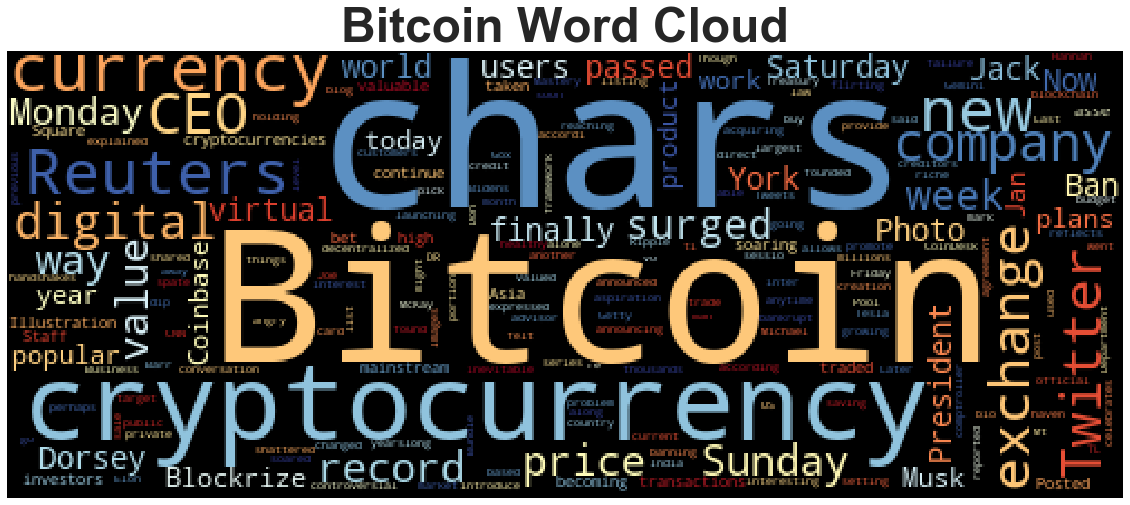

In [36]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

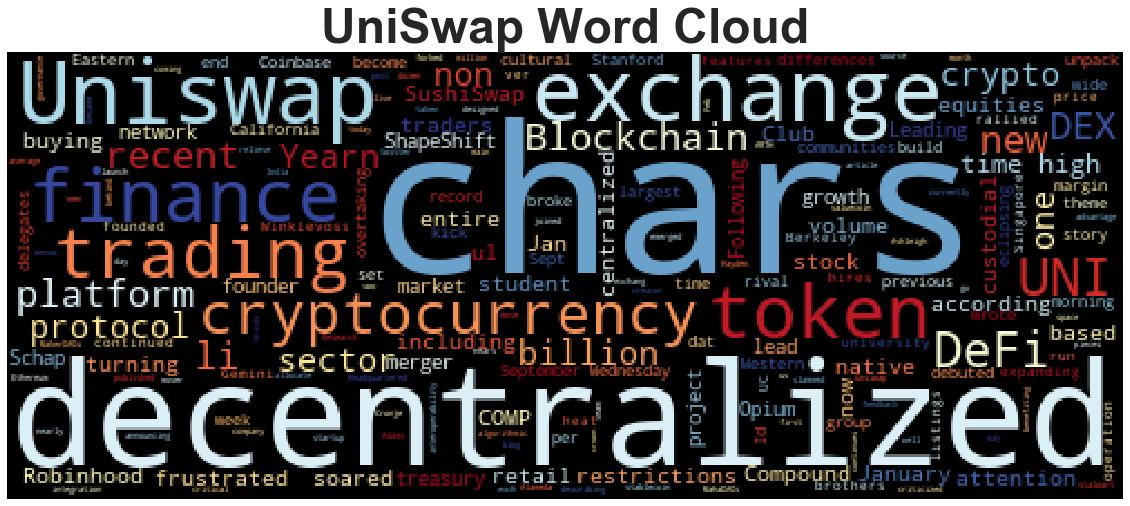

In [38]:
wordcloud(swap.text.str.cat(), title="UniSwap Word Cloud")